In [3]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Untuk tesseract di windows
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

## Text to image

In [15]:
img = cv2.imread('ComicSans.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)

In [16]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

In [17]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:")
print(out_below)


OUTPUT:
ABCDEFGHIJ KLM
NOPQRSTUVWXYZ
abcdefghijklm
nopaqrstuvwxyz
1234567890



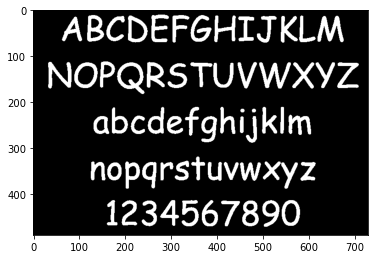

In [18]:
plot_image(img)

In [19]:
img = cv2.imread('Jokerman.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)

In [20]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

In [21]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:")
print(out_below)


OUTPUT:
ABCDEFGHIFKLM
NOPQRSTUVWXYZ
abedefghijkim
hopgrstuywxyz

1234567846



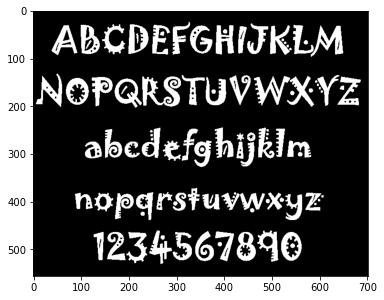

In [22]:
plot_image(img)

In [23]:
img = cv2.imread('OldEnglish.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)

In [24]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

In [25]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:")
print(out_below)


OUTPUT:
ABCDEFOHIFLLM
NOPECRSTAVWXBZ
abrdefghijkim
nopgrstubwxps
1234567890



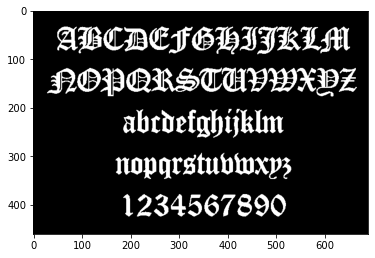

In [26]:
plot_image(img)

## Getting boxes around the text

In [36]:
img = cv2.imread('ComicSans.jpg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [28]:
from pytesseract import Output
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [29]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(float(d['conf'][i])) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [37]:
img = cv2.imread('Jokerman.jpg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [31]:
from pytesseract import Output
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [32]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(float(d['conf'][i])) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [38]:
img = cv2.imread('OldEnglish.jpeg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [34]:
from pytesseract import Output
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [35]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(float(d['conf'][i])) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

## Codex Seraphinianus

In [15]:
img = cv2.imread('Codex Seraphinianus.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)

In [16]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

In [17]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:")
print(out_below)


OUTPUT:
Cyr pinghfrS JA Manado? Ing
FO Es prayed JBOD Inge? bony
peed fog fpriy OD Qreg fit On pig D
sighted Fitiy dig Ange? Somyee? BB)
Age dries papi) pnbeh Soya Lpid
le Gosinged prtyerd) pripeal? Qrjpcie.’




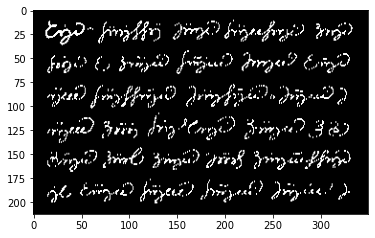

In [18]:
plot_image(img)

In [60]:
img = cv2.imread('Codex Seraphinianus.jpg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

## Pixelated

In [25]:
img = cv2.imread('Pixelated.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)

In [26]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

In [27]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:")
print(out_below)


OUTPUT:
FABCDOEF GH
KLANOP RST
Uv 2.
FABCDOEF GHIA
Od
TUM 2 is!
Oe s456 1649



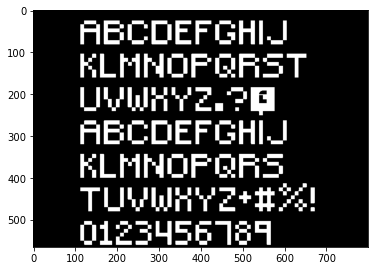

In [28]:
plot_image(img)

In [59]:
img = cv2.imread('Pixelated.jpeg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

## Low Quality

In [32]:
img = cv2.imread('FontLow.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)

In [33]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

In [34]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:")
print(out_below)


OUTPUT:
abcdefg
hijkimn
oparstu
vwxyZ



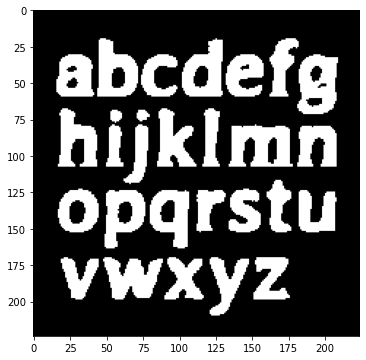

In [35]:
plot_image(img)

In [58]:
img = cv2.imread('FontLow.jpeg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

## Blur

In [51]:
img = cv2.imread('FontBlur.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)

In [52]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

In [53]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:")
print(out_below)


OUTPUT:



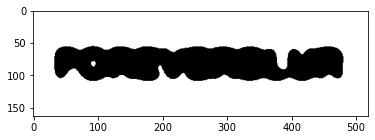

In [54]:
plot_image(img)

In [71]:
img = cv2.imread('Sharp.jpeg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1